# Project 2: Bike Share Data

## Project's goal

In this project, we will use data provided by a bike share system called __Motivate__, to study bike share usage patterns. We will compare the service usage between: Chicago, New York City, and Washington, DC.

## Project's specific goals

The specific goals are obtaining a variety of descriptive statistics to provide the following information:

### #1 Popular times of travel (i.e., occurs most often in the start time)

1. Most common month
2. Most common day of week
3. Most common hour of day

### #2 Popular stations and trip

1. Most common start station
2. Most common end station
3. Most common trip from start to end (i.e., most frequent combination of start station and end station)

### #3 Trip duration

1. Total travel time
2. Average travel time

### #4 User info

1. Counts of each user type
2. Counts of each gender (only available for NYC and Chicago)
3. Earliest, most recent, most common year of birth (only available for NYC and Chicago)

## Who is *Motivate*

Motivate is the leader of bike service providers in the United States and is revolutionizing the landscape of the cities, making them more accessible, healthier and sustainable.

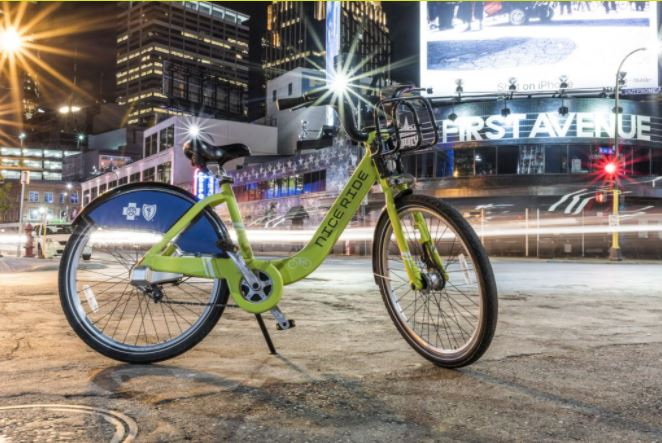

                                Image and information extracted from https://www.motivateco.com/

### Practice problem # 1

Use pandas to load chicago.csv into a dataframe, and find the most frequent hour when people start traveling. There isn't an hour column in this dataset, but you can create one by extracting the hour from the "Start Time" column. To do this, you can convert "Start Time" to the datetime datatype using the pandas to_datetime() method and extracting properties such as the hour with these properties.

Hint: Another way to describe the most common value in a column is the mode.

My solution

In [ ]:
import pandas as pd

filename = 'chicago.csv'

# load data file into a dataframe
df = pd.read_csv(filename)

# convert the Start Time column to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])
#print(df.info())
# extract hour from the Start Time column to create an hour column
df['hour'] =df['Start Time'].dt.hour
#print(df.info())
#print(df.head())
# find the most common hour (from 0 to 23)

popular_hour = df['hour'].value_counts().argmax()

print('Most Frequent Start Hour:', popular_hour)


Suggested solution

In [ ]:
import pandas as pd

filename = 'chicago.csv'

# load data file into a dataframe
df = pd.read_csv(filename)

# convert the Start Time column to datetime
df['Start Time'] = pd.to_datetime(df['Start Time'])

# extract hour from the Start Time column to create an hour column
df['hour'] = df['Start Time'].dt.hour

# find the most popular hour
popular_hour = df['hour'].mode()[0]

print('Most Popular Start Hour:', popular_hour)

### Practice Problem #2: Display a Breakdown of User Types

There are different types of users specified in the "User Type" column. Find how many there are of each type and store the counts in a pandas Series in the user_types variable.

Hint: What pandas function returns a Series with the counts of each unique value in a column?

My solution

In [ ]:
import pandas as pd

filename = 'chicago.csv'

# load data file into a dataframe
df = pd.read_csv(filename)

# print value counts for each user type
user_types = df['User Type'].value_counts()

print(user_types)

Propossed solution

In [ ]:
import pandas as pd

filename = 'chicago.csv'

# load data file into a dataframe
df = pd.read_csv(filename)

# print value counts for each user type
user_types = df['User Type'].value_counts()

print(user_types)

### Practice Problem #3: Load and Filter the Dataset

This is a bit of a bigger task, which involves choosing a dataset to load and filtering it based on a specified month and day.

In the quiz below, you'll implement the load_data() function, which you can use directly in your project. There are four steps:

Load the dataset for the specified city. Index the global CITY_DATA dictionary object to get the corresponding filename for the given city name.

Create month and day_of_week columns. Convert the "Start Time" column to datetime and extract the month number and weekday name into separate columns using the datetime module.

Filter by month. Since the month parameter is given as the name of the month, you'll need to first convert this to the corresponding month number. Then, select rows of the dataframe that have the specified month and reassign this as the new dataframe.

Filter by day of week. Select rows of the dataframe that have the specified day of week and reassign this as the new dataframe. (Note: Capitalize the day parameter with the title() method to match the title case used in the day_of_week column!)

My solution

In [ ]:
import pandas as pd

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - pandas DataFrame containing city data filtered by month and day
    """
    
    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name


    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month)+1
    
        # filter by month to create the new dataframe
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]
    
    return df
    
df = load_data('chicago', 'march', 'friday')

Propossed solution

In [ ]:
import pandas as pd

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """

    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month and day of week from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.weekday_name

    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1

        # filter by month to create the new dataframe
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]

    return df

### How to Complete and Submit this Project

You have two options for working on and submitting your project:

__Option #1)__ On the next page, "Project Workspace: Complete and Submit Project," you will see that there is a workspace environment set up where you can do all your work on your Python script, and run it with the terminal provided. This is great if you do not want to work on your local machine, or worry about system requirements.

Clicking "Open File" allows you to open any .py file in the workspace. Clicking on "Open Terminal" will bring up a terminal interface similar to the one on your local machine. You can then execute a Python script from your workspace, like bikeshare.py, in this terminal in the same way that you would on your machine, by typing after the prompt "python bikeshare.py".

The environment will continually save your work.

If you choose this option #1, then you should also submit your project right from this workspace. You won't upload any files for your submission with this option, because the .py file in the workspace will be uploaded by default.

__Option #2)__ You can work on your Python script on your local machine. To do this, you should download the necessary project files from the Resources tab (the folder icon in the left sidebar here).

If you choose this option #2, please submit your project using the button on the last page of this lesson, "Project: Explore US Bikeshare Data," where you will be able to upload your project files.

__You should choose one of these two options above - don't try to submit your project in both places.__

With either option, before you submit, make sure your project meets all the necessary elements of the Project Rubric.

In [16]:
print('Hello! Let\'s explore some US bikeshare data!')
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
cities_filter = {1: "chicago", 2: "new york", 3: "washington"}    
month_filter = {0:"all", 1:"january", 2:"february", 3:"march", 4:"april", 5:"may", 6:"june", 7:"july", 8:"august", 9:"september", 10:"october", 11:"november", 12:"december"}
day_filter = {0:"all", 1:"monday", 2:"thursday", 3:"wednesday", 4:"tuesday", 5:"friday", 6:"saturday", 7:"sunday"}

#try: 
   # input_city = int(input("Type the city you want to analyze: \n 1: For Chicago information, \n 2: For New York information, and \n 3: For Washington information "))     
    #while input_city not in range(1,4):
     #   input_city = int(input("You entered {}, which is not a valid option, please type 1, 2 or 3".format(input_city)))
#except ValueError as ve:
    #print("You entered a string. Please run again and type 1, 2 or 3")
    #exit()
#selected_city_filter = cities_filter[input_city]
#print(selected_city_filter)

#try:
 #   input_month = int(input("Select the number of the month that you want to analyze: \nType the number as follows:\n\n 0: All\n 1: January\n 2: February\n 3: March\n 4: April\n 5: May\n 6: June \n 7: July\n 8: August\n 9: September\n 10: October\n 11: November\n 12: December"))
  #  while input_month not in range(0,13) :
   #     input_month = int(input("You entered {}, which is not a valid option, please type a number from 0 to 12".format(input_month)))
#except ValueError as va:
 #   print("You entered a string. Please run again and type a number from 0 to 12")

#selected_month_filter = month_filter[input_month]
#print(selected_month_filter)

# TO DO: get user input for day of week (all, monday, tuesday, ... sunday)
try:
    input_day = int(input("Select the number of the day that you want to analyze. \nType the number as follows:\n\n 0: All\n 1: Monday\n 2: Thursday\n 3: Wednesday\n 4: Tuesday\n 5: Friday\n 6: Saturday \n 7: Sunday"))
    while input_day not in range(0,8) :
        input_day = int(input("You entered {}, which is not a valid option, please type a number from 0 to 7".format(input_day)))
except ValueError as va:
    print("You entered a string. Please run again and type a number from 0 to 7")
selected_day_filter = day_filter[input_day]
print(selected_day_filter)

Hello! Let's explore some US bikeshare data!
Select the number of the day that you want to analyze. 
Type the number as follows:

 0: All
 1: Monday
 2: Thursday
 3: Wednesday
 4: Tuesday
 5: Friday
 6: Saturday 
 7: Sunday8
You entered 8, which is not a valid option, please type a number from 0 to 711
You entered 11, which is not a valid option, please type a number from 0 to 7101
You entered 101, which is not a valid option, please type a number from 0 to 77
sunday


In [20]:
import time
import pandas as pd
import numpy as np

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    cities_filter = {1: "chicago", 2: "new york", 3: "washington"}    
    month_filter = {0:"all", 1:"january", 2:"february", 3:"march", 4:"april", 5:"may", 6:"june", 7:"july", 8:"august", 9:"september", 10:"october", 11:"november", 12:"december"}
    day_filter = {0:"all", 1:"monday", 2:"thursday", 3:"wednesday", 4:"tuesday", 5:"friday", 6:"saturday", 7:"sunday"}

    try: 
        input_city = int(input("Type the city you want to analyze: \n 1: For Chicago information, \n 2: For New York information, and \n 3: For Washington information "))     
        while input_city not in range(1,4):
            input_city = int(input("You entered {}, which is not a valid option, please type 1, 2 or 3".format(input_city)))
    except ValueError as ve:
        input_city = print("You entered a string. Please run again and type 1, 2 or 3")
    selected_city_filter = cities_filter[input_city]
    print(selected_city_filter)
    
    # TO DO: get user input for month (all, january, february, ... , june)
    
    try:
        input_month = int(input("Select the number of the month that you want to analyze. \nType the number as follows:\n\n 0: All\n 1: January\n 2: February\n 3: March\n 4: April\n 5: May\n 6: June \n 7: July\n 8: August\n 9: September\n 10: October\n 11: November\n 12: December"))
        while input_month not in range(0,13) :
             input_month = int(input("You entered {}, which is not a valid option, please type a number from 0 to 12".format(input_month)))
    except ValueError as va:
        print("You entered a string. Please run again and type a number from 0 to 12")
    selected_month_filter = month_filter[input_month]
    print(selected_month_filter)
 
        
    # TO DO: get user input for day of week (all, monday, tuesday, ... sunday)
    try:
        input_day = int(input("Select the number of the day that you want to analyze. \nType the number as follows:\n\n 0: All\n 1: Monday\n 2: Thursday\n 3: Wednesday\n 4: Tuesday\n 5: Friday\n 6: Saturday \n 7: Sunday"))
        while input_day not in range(0,8) :
             input_day = int(input("You entered {}, which is not a valid option, please type a number from 0 to 7".format(input_day)))
    except ValueError as vd:
        print("You entered a string. Please run again and type a number from 0 to 7")
    selected_day_filter = day_filter[input_day]
    print(selected_day_filter)

    print('-'*40)
    return selected_city_filter, selected_month_filter, selected_day_filter

get_filters()

Hello! Let's explore some US bikeshare data!
Type the city you want to analyze: 
 1: For Chicago information, 
 2: For New York information, and 
 3: For Washington information 1
chicago
Select the number of the month that you want to analyze. 
Type the number as follows:

 0: All
 1: January
 2: February
 3: March
 4: April
 5: May
 6: June 
 7: July
 8: August
 9: September
 10: October
 11: November
 12: December2
february
Select the number of the day that you want to analyze. 
Type the number as follows:

 0: All
 1: Monday
 2: Thursday
 3: Wednesday
 4: Tuesday
 5: Friday
 6: Saturday 
 7: Sunday3
wednesday
----------------------------------------


('chicago', 'february', 'wednesday')

In [22]:
import time
import pandas as pd
import numpy as np

CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }
cities_filter = {1: "chicago", 2: "new york city", 3: "washington"}    
month_filter = {0:"all", 1:"january", 2:"february", 3:"march", 4:"april", 5:"may", 6:"june", 7:"july", 8:"august", 9:"september", 10:"october", 11:"november", 12:"december"}
day_filter = {0:"all", 1:"monday", 2:"thursday", 3:"wednesday", 4:"tuesday", 5:"friday", 6:"saturday", 7:"sunday"}

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs

    try: 
        input_city = int(input("Type the city you want to analyze: \n 1: For Chicago information, \n 2: For New York information, and \n 3: For Washington information "))     
        while input_city not in range(1,4):
            input_city = int(input("You entered {}, which is not a valid option, please type 1, 2 or 3".format(input_city)))
    except ValueError as ve:
        input_city = print("You entered a string. Please run again and type 1, 2 or 3")
    selected_city_filter = cities_filter[input_city]
    print(selected_city_filter)
    
    # TO DO: get user input for month (all, january, february, ... , june)
    
    try:
        input_month = int(input("Select the number of the month that you want to analyze. \nType the number as follows:\n\n 0: All\n 1: January\n 2: February\n 3: March\n 4: April\n 5: May\n 6: June \n 7: July\n 8: August\n 9: September\n 10: October\n 11: November\n 12: December"))
        while input_month not in range(0,13) :
             input_month = int(input("You entered {}, which is not a valid option, please type a number from 0 to 12".format(input_month)))
    except ValueError as va:
        print("You entered a string. Please run again and type a number from 0 to 12")
    selected_month_filter = month_filter[input_month]
    print(selected_month_filter)
 
        
    # TO DO: get user input for day of week (all, monday, tuesday, ... sunday)
    try:
        input_day = int(input("Select the number of the day that you want to analyze. \nType the number as follows:\n\n 0: All\n 1: Monday\n 2: Thursday\n 3: Wednesday\n 4: Tuesday\n 5: Friday\n 6: Saturday \n 7: Sunday"))
        while input_day not in range(0,8) :
             input_day = int(input("You entered {}, which is not a valid option, please type a number from 0 to 7".format(input_day)))
    except ValueError as vd:
        print("You entered a string. Please run again and type a number from 0 to 7")
    selected_day_filter = day_filter[input_day]
    print(selected_day_filter)

    print('-'*40)
    return selected_city_filter, selected_month_filter, selected_day_filter


def load_data(selected_city_filter, selected_month_filter, selected_day_filter):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
# load data file into a dataframe
    df = pd.read_csv(CITY_DATA[selected_city_filter])
# convert the Start Time column to datetime
    df["Start Time"] = pd.to_datetime(df["Start Time"])
# extract month and day of week from Start Time to create new columns
    df["month"] = df["Start Time"].dt.month
    df["day_of_week"] = df["Start Time"].dt.weekday_name
    
# filter by month if applicable
    if selected_month_filter != "all":
        # use the index of the months list to get the corresponding int
        months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
        selected_month_filter = months.index(selected_month_filter)+1
    
        # filter by month to create the new dataframe
        df = df[df['month'] == selected_month_filter]

    # filter by day of week if applicable
    if selected_day_filter != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == selected_day_filter.title()]
    
    return df


def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()
    # convert the Start Time column to datetime
    df["Start Time"] = pd.to_datetime(df["Start Time"])
    #print(df.info())
    
    # TO DO: display the most common month
    df["month"] = df["Start Time"].dt.month
    popular_month = df["month"].mode()[0] 
    print("Most Frequent month:", popular_month)

    # TO DO: display the most common day of week
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    print(df.head())
    popular_day = df["day_of_week"].mode()[0] 
    print('Most Frequent day:', popular_day)
    
    # TO DO: display the most common start hour
    df["hour"] =df["Start Time"].dt.hour     # extract hour from the Start Time column to create an hour column
    popular_hour = df["hour"].mode()[0]     # find the most common hour (from 0 to 23)
    print("Most Frequent Start Hour:", popular_hour)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # TO DO: display most commonly used start station
    popular_start_station = df["Start Station"].mode()[0]
    print("The most commonly used start station is: {}".format(popular_start_station))
    # TO DO: display most commonly used end station
    popular_end_station = df["End Station"].mode()[0]
    print("The most commonly used end station is: {}".format(popular_end_station))

    # TO DO: display most frequent combination of start station and end station trip
#Create first a new column with combined start and end stations separated by comma
    df["origin/end_trip_comb"] = df["Start Station"] + "," + df["End Station"]
    popular_combination =  df["origin/end_trip_comb"].mode()[0]
    print("The most popular trip combination is the origin from:{} and end at:{}".format(popular_combination.split(",")[0],popular_combination.split(",")[1]))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # TO DO: display total travel time
    total_travel_time = df["Trip Duration"].sum()
    #print(total_travel_time, type(total_travel_time))
    hours = int(total_travel_time/3600)
    minutes = int((total_travel_time%3600)/60)
    seconds = int((total_travel_time%3600)%60)
    print("The total travel time is:\n    {} hours,\n    {} minutes, and\n    {} seconds".format(hours, minutes, seconds))

    # TO DO: display mean travel time
    mean_travel_time = df["Trip Duration"].mean()
    #alternative way to obtain the same result: mean_travel_time = total_travel_time/df["Trip Duration"].count() 
    mean_hours = int(mean_travel_time/3600)
    mean_minutes = int((mean_travel_time%3600)/60)
    mean_seconds = int((mean_travel_time%3600)%60)
    print("The mean travel time is:\n    {} hours,\n    {} minutes, and\n    {} seconds".format(mean_hours, mean_minutes, mean_seconds))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # TO DO: Display counts of user types
    user_types_count = df["User Type"].value_counts()
    print("The total of users per type is: \n{}".format(user_types_count))
    # TO DO: Display counts of gender
    user_gender_count = df["Gender"].value_counts()
    print("The total of users per gender is: \n{}".format(user_gender_count))

    # TO DO: Display earliest, most recent, and most common year of birth
    print("Calculating birth year stats...")
    #earliest
    earliest_birth_year = df["Birth Year"].min()
    print("        The most earliest birth year is: {}.".format(earliest_birth_year))
    #most recent
    recent_birth_year = df["Birth Year"].max()
    print("        The most recent birth year is: {}.".format(recent_birth_year))
    #most common
    common_birth_year = df["Birth Year"].mode()[0]
    print("        The most common birth year is: {}.".format(common_birth_year))
   
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
    main()
#    print(time_stats(pd.read_csv(CITY_DATA["chicago"])))
    # print(station_stats(pd.read_csv(CITY_DATA["chicago"])))
    #print(trip_duration_stats(pd.read_csv(CITY_DATA["chicago"])))
#    print(user_stats(pd.read_csv(CITY_DATA["chicago"])))

Hello! Let's explore some US bikeshare data!
Type the city you want to analyze: 
 1: For Chicago information, 
 2: For New York information, and 
 3: For Washington information 1
chicago
Select the number of the month that you want to analyze. 
Type the number as follows:

 0: All
 1: January
 2: February
 3: March
 4: April
 5: May
 6: June 
 7: July
 8: August
 9: September
 10: October
 11: November
 12: December2
february
Select the number of the day that you want to analyze. 
Type the number as follows:

 0: All
 1: Monday
 2: Thursday
 3: Wednesday
 4: Tuesday
 5: Friday
 6: Saturday 
 7: Sunday3
wednesday
----------------------------------------


FileNotFoundError: [Errno 2] File chicago.csv does not exist: 'chicago.csv'

In [1]:
import time
import pandas as pd
import numpy as np

#Dictionaries used to compare user input and valid available information
CITY_DATA = { 'chicago': 'chicago.csv',
              'new york city': 'new_york_city.csv',
              'washington': 'washington.csv' }
cities_filter = {1: "chicago", 2: "new york city", 3: "washington"}    
month_filter = {0:"all", 1:"january", 2:"february", 3:"march", 4:"april", 5:"may", 6:"june", 7:"july", 8:"august", 9:"september", 10:"october", 11:"november", 12:"december"}
day_filter = {0:"all", 1:"monday", 2:"tuesday", 3:"wednesday", 4:"thursday", 5:"friday", 6:"saturday", 7:"sunday"}

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.

    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    time.sleep(1)
    # TO DO: get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    try: 
        input_city = int(input("Type the city you want to analyze: \n 1: For Chicago information, \n 2: For New York information, and \n 3: For Washington information \n"))     
        while input_city not in range(1,4):
            input_city = int(input("You entered {}, which is not a valid option, please type 1, 2 or 3".format(input_city)))
    except ValueError as ve:
        input_city = print("You entered a string. Please run again and type 1, 2 or 3")
    
    time.sleep(1)
    selected_city_filter = cities_filter[input_city]
    
    print("You have selected: {}.".format(selected_city_filter))
    
    # TO DO: get user input for month (all, january, february, ... , june)
    try:
        input_month = int(input("Select the number of the month that you want to analyze. \nType the number as follows:\n\n 0: All\n 1: January\n 2: February\n 3: March\n 4: April\n 5: May\n 6: June \n 7: July\n 8: August\n 9: September\n 10: October\n 11: November\n 12: December\n"))
        while input_month not in range(0,13) :
             input_month = int(input("You entered {}, which is not a valid option, please type a number from 0 to 12".format(input_month)))
    except ValueError as va:
        print("You entered a string. Please run again and type a number from 0 to 12")
    
    selected_month_filter = month_filter[input_month]
    print("You have selected: {}.".format(selected_month_filter))
 
    time.sleep(1)
        
    # TO DO: get user input for day of week (all, monday, tuesday, ... sunday)
    try:
        input_day = int(input("Select the number of the day that you want to analyze. \nType the number as follows:\n\n 0: All\n 1: Monday\n 2: Tuesday\n 3: Wednesday\n 4: Thursday\n 5: Friday\n 6: Saturday \n 7: Sunday\n"))
        while input_day not in range(0,8) :
             input_day = int(input("You entered {}, which is not a valid option, please type a number from 0 to 7".format(input_day)))
    except ValueError as vd:
        print("You entered a string. Please run again and type a number from 0 to 7")
    selected_day_filter = day_filter[input_day]
    print("You have selected: {}.".format(selected_day_filter))

    print('-'*40)
    return selected_city_filter, selected_month_filter, selected_day_filter


def load_data(selected_city_filter, selected_month_filter, selected_day_filter):
    """
    Loads data for the specified city and filters by month and day if applicable.

    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
# load data file into a dataframe
    df = pd.read_csv(CITY_DATA[selected_city_filter])
# convert the Start Time column to datetime
    df["Start Time"] = pd.to_datetime(df["Start Time"])
# extract month and day of week from Start Time to create new columns
    df["month"] = df["Start Time"].dt.month
    df["day_of_week"] = df["Start Time"].dt.weekday_name
    
# filter by month if applicable
    if selected_month_filter != "all":
        # use the index of the months list to get the corresponding int
        months = ["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
        selected_month_filter = months.index(selected_month_filter)+1
    
        # filter by month to create the new dataframe
        df = df[df['month'] == selected_month_filter]

    # filter by day of week if applicable
    if selected_day_filter != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == selected_day_filter.title()]
    
    return df


def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()
    # convert the Start Time column to datetime
    df["Start Time"] = pd.to_datetime(df["Start Time"])
    #print(df.info())
    
    # TO DO: display the most common month
    df["month"] = df["Start Time"].dt.month
    popular_month = df["month"].mode()[0] 
    print("Most Frequent month:", popular_month)

    # TO DO: display the most common day of week
    df['day_of_week'] = df['Start Time'].dt.weekday_name
    #print(df.head())
    popular_day = df["day_of_week"].mode()[0] 
    print('Most Frequent day:', popular_day)
    
    # TO DO: display the most common start hour
    df["hour"] =df["Start Time"].dt.hour     # extract hour from the Start Time column to create an hour column
    popular_hour = df["hour"].mode()[0]     # find the most common hour (from 0 to 23)
    print("Most Frequent Start Hour:", popular_hour)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # TO DO: display most commonly used start station
    popular_start_station = df["Start Station"].mode()[0]
    print("The most commonly used start station is: {}".format(popular_start_station))
    # TO DO: display most commonly used end station
    popular_end_station = df["End Station"].mode()[0]
    print("The most commonly used end station is: {}".format(popular_end_station))

    # TO DO: display most frequent combination of start station and end station trip
#Create first a new column with combined start and end stations separated by comma
    df["origin/end_trip_comb"] = df["Start Station"] + "," + df["End Station"]
    popular_combination =  df["origin/end_trip_comb"].mode()[0]
    print("The most popular trip combination is the origin from:{} and end at:{}".format(popular_combination.split(",")[0],popular_combination.split(",")[1]))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # TO DO: display total travel time
    total_travel_time = df["Trip Duration"].sum()
    #print(total_travel_time, type(total_travel_time))
    hours = int(total_travel_time/3600)
    minutes = int((total_travel_time%3600)/60)
    seconds = int((total_travel_time%3600)%60)
    print("The total travel time is:\n    {} hours,\n    {} minutes, and\n    {} seconds".format(hours, minutes, seconds))

    # TO DO: display mean travel time
    mean_travel_time = df["Trip Duration"].mean()
    #alternative way to obtain the same result: mean_travel_time = total_travel_time/df["Trip Duration"].count() 
    mean_hours = int(mean_travel_time/3600)
    mean_minutes = int((mean_travel_time%3600)/60)
    mean_seconds = int((mean_travel_time%3600)%60)
    print("The mean travel time is:\n    {} hours,\n    {} minutes, and\n    {} seconds".format(mean_hours, mean_minutes, mean_seconds))

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df, city):
    """
    Displays statistics on bikeshare users. 
    Since in Washington there is no gender column, we will not compute this case
    """

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # TO DO: Display counts of user types
    user_types_count = df["User Type"].value_counts()
    print("The total of users per type is: \n{}".format(user_types_count))
    # TO DO: Display counts of gender
    if city != "washington":
        user_gender_count = df["Gender"].value_counts()
        print("The total of users per gender is: \n{}".format(user_gender_count))
    else:
        print("We do not have gender data for washington city, so this will not be shown...")
    
    # TO DO: Display earliest, most recent, and most common year of birth
    if city != "washington":
        print("Calculating birth year stats...")
        #earliest
        earliest_birth_year = df["Birth Year"].min()
        print("        The most earliest birth year is: {}.".format(earliest_birth_year))
        #most recent
        recent_birth_year = df["Birth Year"].max()
        print("        The most recent birth year is: {}.".format(recent_birth_year))
        #most common
        common_birth_year = df["Birth Year"].mode()[0]
        print("        The most common birth year is: {}.".format(common_birth_year))
   
    else:
        print("We do not have birth year data for washington city, so this will not be shown...")
   
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)

def replace_NaN(df):
    '''
    Take the input dataframe and show theuser some NaN statistics and replace all the NaN values with zeros or "" values according to column type.
    INPUT: the panda's dataframe
    OUTPUT: the panda's dataframe with NaN replaced if the user wanted so
    '''

    print("Obtaining NaN total count and distribution per column...\n")
    nan_in_df_1 = df.isnull().sum().sum()
    nan_in_df_2 = df.isnull().sum() 
    print("There are: {} NaN values in this dataframe, and the distribution per column es: \n{}".format(nan_in_df_1,nan_in_df_2))
    
    #iterate over dtype(column name, Series) pairs to get the value (type of column) for certain index (name of column) replacing NaN to '' if it is an object, or "0" if it is not
    for index, value in df.dtypes.items(): 
        if value == 'object':
            df[index] = df[index].fillna('')
        else:
            df[index] = df[index].fillna(0)
    
    print("Procedding to replace them all")
    nan_in_df_1 = df.isnull().sum().sum()
    nan_in_df_2 = df.isnull().sum() 
    print("Now, there are: {} NaN values in this dataframe, and the distribution per column es: \n{}".format(nan_in_df_1,nan_in_df_2))

    return df
    
    
def main(): #There are some time.sleep timers between user inputs and functions to not saturate the user with all the information'''
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)
        
        #Show the user a preview of the information in the selected dataframe
        print("{} has the following data previsualization:\n{}".format(city.capitalize(),df.head()))
        print('-'*40)

        time.sleep(1)
        
        #Ask the user if replacing "NaN" values is required      
        user_NaN_selection = input("Do you want to analyze and replace the NaN values of the selected dataframe?:\nType \"y\" for yes or \"n\" for no")
        try:
            if user_NaN_selection == "n":
                print("The following analysis does not replace NaN values for calculations...")
            elif user_NaN_selection == "y":
                if df.isnull().sum().sum() == 0:
                    print("The selected filters does not have any NaN values. The program will continue...")
                else:
                    replace_NaN(df) 
            else:
                print("You did not select a valid answer, the program will run without replacing NaN values...") 
        except ValueError as ve:
            print("You did not select a valid answer, the program will run without replacing NaN values...")
        
        time_stats(df)
        time.sleep(1)
        
        station_stats(df)
        time.sleep(1)
        
        trip_duration_stats(df)
        time.sleep(1)
        
        user_stats(df,city)
        time.sleep(1)
        
        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
    main()


Hello! Let's explore some US bikeshare data!
Type the city you want to analyze: 
 1: For Chicago information, 
 2: For New York information, and 
 3: For Washington information 
1
You have selected: chicago.
Select the number of the month that you want to analyze. 
Type the number as follows:

 0: All
 1: January
 2: February
 3: March
 4: April
 5: May
 6: June 
 7: July
 8: August
 9: September
 10: October
 11: November
 12: December
2
You have selected: february.
Select the number of the day that you want to analyze. 
Type the number as follows:

 0: All
 1: Monday
 2: Tuesday
 3: Wednesday
 4: Thursday
 5: Friday
 6: Saturday 
 7: Sunday
3
You have selected: wednesday.
----------------------------------------


FileNotFoundError: [Errno 2] File chicago.csv does not exist: 'chicago.csv'